## Generate result CSV

### Generate Ablation Study result CSV

In [20]:
import pandas as pd

seedList = [6, 7, 10, 11, 19, 22, 31, 42, 666, 888]
datasetName = "x86_64_withVal_withPretrain_ghidra_"
checkpointsFolder = "checkpoints/"
outputDfTest = pd.DataFrame(columns=["Net", "Meta_Learning", "Pretrain"," 5way_5shot", " 5way_10shot", " 10way_5shot", " 10way_10shot"])
outputDfVal = pd.DataFrame(columns=["Net", "Meta_Learning", "Pretrain"," 5way_5shot", " 5way_10shot", " 10way_5shot", " 10way_10shot"])

In [21]:
for seed in seedList:
    print("Seed: ", seed)
    expCsvPath = checkpointsFolder + datasetName + str(seed) + "/evalLog.csv"
    print("Exp csv path: ", expCsvPath)
    expDf = pd.read_csv(expCsvPath)
    for row in expDf.iterrows():
        row = row[1]
        print(row)
        exp = row[" folderName"].split("_")[0] + "_" + row[" folderName"].split("_")[1]
        net = row[" folderName"].split("_")[2]
        pretrain = True if row[" folderName"].split("_")[3] == "with" else False
        meta = False if "backbone" in row[" model"] else True
        meta = False if row[" model"] == " None" else meta
        testAcc = row[" test_acc"]
        valAcc = row[" val_acc"]
        outputRowTest = {"Net": net, "Meta_Learning": meta, "Pretrain": pretrain, " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
        outputRowVal = {"Net": net, "Meta_Learning": meta, "Pretrain": pretrain, " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
        if outputDfTest[(outputDfTest["Net"] == net) & (outputDfTest["Meta_Learning"] == meta) & (outputDfTest["Pretrain"] == pretrain)].empty:
            outputDfTest = pd.concat([outputDfTest, pd.DataFrame(outputRowTest, index=[0])], ignore_index=True)
        if outputDfVal[(outputDfVal["Net"] == net) & (outputDfVal["Meta_Learning"] == meta) & (outputDfVal["Pretrain"] == pretrain)].empty:
            outputDfVal = pd.concat([outputDfVal, pd.DataFrame(outputRowVal, index=[0])], ignore_index=True)
        outputDfTest.loc[(outputDfTest["Net"] == net) & (outputDfTest["Meta_Learning"] == meta) & (outputDfTest["Pretrain"] == pretrain), [exp]] += testAcc
        outputDfVal.loc[(outputDfVal["Net"] == net) & (outputDfVal["Meta_Learning"] == meta) & (outputDfVal["Pretrain"] == pretrain), [exp]] += valAcc       
        # if outputDf[(outputDf["Net"] == net) & (outputDf["Meta_Learning"] == meta) & (outputDf["Pretrain"] == pretrain) & (outputDf["Data"] == "Test")].empty:
        #     outputDf = pd.concat([outputDf, pd.DataFrame(outputRowTest, index=[0])], ignore_index=True)
        # if outputDf[(outputDf["Net"] == net) & (outputDf["Meta_Learning"] == meta) & (outputDf["Pretrain"] == pretrain) & (outputDf["Data"] == "Val")].empty:
        #     outputDf = pd.concat([outputDf, pd.DataFrame(outputRowVal, index=[0])], ignore_index=True)
        # outputDf.loc[(outputDf["Net"] == net) & (outputDf["Meta_Learning"] == meta) & (outputDf["Pretrain"] == pretrain) & (outputDf["Data"] == "Test"), [exp]] += testAcc
        # outputDf.loc[(outputDf["Net"] == net) & (outputDf["Meta_Learning"] == meta) & (outputDf["Pretrain"] == pretrain) & (outputDf["Data"] == "Val"), [exp]] += valAcc

for index, row in outputDfTest.iterrows():
    for col in row.index:
        if "way" in col:
            outputDfTest.loc[index, [col]] /= seedList.__len__()

for index, row in outputDfVal.iterrows():
    for col in row.index:
        if "way" in col:
            outputDfVal.loc[index, [col]] /= seedList.__len__()

            


Seed:  6
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_6/evalLog.csv
timestamp                             2025-01-04 00:28:35.169630
 folderName     5way_5shot_ProtoNet_with_pretrain_20250103_17...
 model                                        epoch_500_best.pth
 test_acc                                                0.72564
 val_acc                                                0.891053
Name: 0, dtype: object
timestamp                             2025-01-04 00:34:14.384020
 folderName     5way_5shot_ProtoNet_with_pretrain_20250103_17...
 model                              epoch_2060_best_backbone.pth
 test_acc                                                 0.6594
 val_acc                                                 0.62952
Name: 1, dtype: object
timestamp                             2025-01-04 01:03:46.943902
 folderName     5way_5shot_ProtoNet_without_pretrain_20250104...
 model                                         epoch_10_best.pth
 test_acc               

In [22]:
outputTestCsvPath = f"logs/{datasetName}result_testing.csv"
outputDfTest.to_csv(outputTestCsvPath, index=False)
outputValCsvPath = f"logs/{datasetName}result_validation.csv"
outputDfVal.to_csv(outputValCsvPath, index=False)


### Generate Proto vs Nn vs SNn

In [5]:
import pandas as pd

seedList = [6, 7, 10, 11, 19, 22, 31, 42, 666, 888]
datasetName = "x86_64_withVal_withPretrain_ghidra_"
checkpointsFolder = "checkpoints/"
outputDfTest = pd.DataFrame(columns=["Net", " 5way_5shot", " 5way_10shot", " 10way_5shot", " 10way_10shot"])

In [6]:
for seed in seedList:
    print("Seed: ", seed)
    expCsvPath = checkpointsFolder + datasetName + str(seed) + "_baseline" + "/evalLog.csv"
    print("Exp csv path: ", expCsvPath)
    expDf = pd.read_csv(expCsvPath)
    for row in expDf.iterrows():
        row = row[1]
        exp = row[" folderName"].split("_")[0] + "_" + row[" folderName"].split("_")[1]
        net = row[" folderName"].split("_")[2]
        pretrain = True if row[" folderName"].split("_")[3] == "with" else False
        meta = False if "backbone" in row[" model"] else True
        meta = False if row[" model"] == " None" else meta
        testAcc = row[" test_acc"]

        if (pretrain and meta) or (net == "SoftNnNet"):
            outputRowTest = {"Net": net, " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
            if outputDfTest[(outputDfTest["Net"] == net)].empty:
                outputDfTest = pd.concat([outputDfTest, pd.DataFrame(outputRowTest, index=[0])], ignore_index=True)
            outputDfTest.loc[(outputDfTest["Net"] == net), [exp]] += testAcc

for index, row in outputDfTest.iterrows():
    for col in row.index:
        if "way" in col:
            outputDfTest.loc[index, [col]] /= seedList.__len__()


Seed:  6
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_6_baseline/evalLog.csv
Seed:  7
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_7_baseline/evalLog.csv
Seed:  10
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_10_baseline/evalLog.csv
Seed:  11
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_11_baseline/evalLog.csv
Seed:  19
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_19_baseline/evalLog.csv
Seed:  22
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_22_baseline/evalLog.csv
Seed:  31
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_31_baseline/evalLog.csv
Seed:  42
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_42_baseline/evalLog.csv
Seed:  666
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_666_baseline/evalLog.csv
Seed:  888
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_888_baseline/evalLog.csv


In [7]:
outputTestCsvPath = f"logs/{datasetName}_baseline_result(Proto&Nn&SoftNn)_testing.csv"
outputDfTest.to_csv(outputTestCsvPath, index=False)

### Generate Proto vs Nn vs SNn vs LP

In [1]:
import pandas as pd

seedList = [6, 7, 10, 11, 19, 22, 31, 42, 666, 888]
datasetName = "x86_64_withVal_withPretrain_ghidra_"
checkpointsFolder = "checkpoints/"
outputDfTest = pd.DataFrame(columns=["Net", " 5way_5shot", " 5way_10shot", " 10way_5shot", " 10way_10shot"])

In [2]:
from datetime import datetime


for seed in seedList:
    print("Seed: ", seed)
    expCsvPath = checkpointsFolder + datasetName + str(seed) + "_baseline" + "/evalLog.csv"
    print("Exp csv path: ", expCsvPath)
    expDf = pd.read_csv(expCsvPath)
    for row in expDf.iterrows():
        row = row[1]
        exp = row[" folderName"].split("_")[0] + "_" + row[" folderName"].split("_")[1]
        net = row[" folderName"].split("_")[2]
        pretrain = True if row[" folderName"].split("_")[3] == "with" else False
        meta = False if "backbone" in row[" model"] else True
        meta = False if row[" model"] == " None" else meta
        testAcc = row[" test_acc"]

        if (pretrain and meta) or (net == "SoftNnNet") or (net == "LabelPropagation"):
            if net == "LabelPropagation": 
                # 將字串時間戳轉換為 datetime 物件
                time_obj = datetime.strptime(row["timestamp"], "%Y-%m-%d %H:%M:%S.%f")
                # 定義要比較的時間點
                target_time = datetime.strptime("2025-03-10 16:56:06.908711", "%Y-%m-%d %H:%M:%S.%f")
                # 比較 datetime 物件
                if time_obj < target_time:
                    continue
                print(exp, testAcc)
            outputRowTest = {"Net": net, " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
            if outputDfTest[(outputDfTest["Net"] == net)].empty:
                outputDfTest = pd.concat([outputDfTest, pd.DataFrame(outputRowTest, index=[0])], ignore_index=True)
            outputDfTest.loc[(outputDfTest["Net"] == net), [exp]] += testAcc

for index, row in outputDfTest.iterrows():
    for col in row.index:
        if "way" in col:
            outputDfTest.loc[index, [col]] /= seedList.__len__()


Seed:  6
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_6_baseline/evalLog.csv
 5way_5shot 0.83620001912117
 5way_10shot 0.8575399768352509
 10way_5shot 0.7616333512067794
 10way_10shot 0.8155399790406227
Seed:  7
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_7_baseline/evalLog.csv
 5way_5shot 0.977253349840641
 5way_10shot 0.9874199883937836
 10way_5shot 0.9779266834259032
 10way_10shot 0.9755799678564072
Seed:  10
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_10_baseline/evalLog.csv
 5way_5shot 0.910186690032482
 5way_10shot 0.9268399774432182
 10way_5shot 0.8617000166773796
 10way_10shot 0.879769982099533
Seed:  11
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_11_baseline/evalLog.csv
 5way_5shot 0.950120022714138
 5way_10shot 0.956039980649948
 10way_5shot 0.9402000219225884
 10way_10shot 0.9417499855160714
Seed:  19
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_19_baseline/evalLog.csv
 5way_5shot 0.94125

In [3]:
outputTestCsvPath = f"logs/{datasetName}_baseline_result(Proto&Nn&SoftNn&LabelPropagation)_testing_new1.csv"
outputDfTest.to_csv(outputTestCsvPath, index=False)

### Generate LP alpha 

In [11]:
import pandas as pd

seedList = [6, 7, 10, 11, 19, 22, 31, 42, 666, 888]
datasetName = "x86_64_withVal_withPretrain_ghidra_"
checkpointsFolder = "checkpoints/"
outputDfTest = pd.DataFrame(columns=["Net", " 5way_5shot", " 5way_10shot", " 10way_5shot", " 10way_10shot"])

In [12]:
for seed in seedList:
    print("Seed: ", seed)
    expCsvPath = checkpointsFolder + datasetName + str(seed) + "_baseline" + "/evalLog.csv"
    print("Exp csv path: ", expCsvPath)
    expDf = pd.read_csv(expCsvPath)
    for row in expDf.iterrows():
        row = row[1]
        exp = row[" folderName"].split("_")[0] + "_" + row[" folderName"].split("_")[1]
        net = row[" folderName"].split("_")[2]
        alpha = row[" folderName"].split("_")[3]
        testAcc = row[" test_acc"]
        if (net == "LabelPropagation") and (alpha.startswith("alpha")):
            print(net, alpha, exp, testAcc)
            outputRowTest = {"Net": net + "_" + alpha, " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
            if outputDfTest[(outputDfTest["Net"] == net + "_" + alpha)].empty:
                outputDfTest = pd.concat([outputDfTest, pd.DataFrame(outputRowTest, index=[0])], ignore_index=True)
            outputDfTest.loc[(outputDfTest["Net"] == net + "_" + alpha), [exp]] += testAcc

for index, row in outputDfTest.iterrows():
    for col in row.index:
        if "way" in col:
            outputDfTest.loc[index, [col]] /= seedList.__len__()

Seed:  6
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_6_baseline/evalLog.csv
LabelPropagation alpha0.5  5way_5shot 0.836840020954609
LabelPropagation alpha0.5  5way_10shot 0.8728399766683579
LabelPropagation alpha0.5  10way_5shot 0.7953733506202698
LabelPropagation alpha0.5  10way_10shot 0.8210999776124954
LabelPropagation alpha0.6  5way_5shot 0.8466400209665298
LabelPropagation alpha0.6  5way_10shot 0.8635399768948555
LabelPropagation alpha0.6  10way_5shot 0.7684333508014679
LabelPropagation alpha0.6  10way_10shot 0.8206799785494805
LabelPropagation alpha0.7  5way_5shot 0.8316000207662583
LabelPropagation alpha0.7  5way_10shot 0.8531599767208099
LabelPropagation alpha0.7  10way_5shot 0.768140016257763
LabelPropagation alpha0.7  10way_10shot 0.8327299783229828
LabelPropagation alpha0.9  5way_5shot 0.8189200189113617
LabelPropagation alpha0.9  5way_10shot 0.8531599769592285
LabelPropagation alpha0.9  10way_5shot 0.774580017387867
LabelPropagation alpha0.9  10way_10shot 

In [13]:
outputTestCsvPath = f"logs/{datasetName}_baseline_result_LabelPropagation_testing_new.csv"
outputDfTest.to_csv(outputTestCsvPath, index=False)

## Plot

### Plot Ablation Study Graph

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

datasetName = "x86_64_withVal_withPretrain_ghidra_"

# 讀取CSV文件
def load_and_process_data(file_path):
    df = pd.read_csv(file_path)
    return df

# 創建圖表
def create_performance_plot(df):
    # 設置圖表風格和大小
    plt.style.use('default')  # 使用默認樣式
    plt.figure(figsize=(15, 8))
    
    # 設置條形圖的位置
    bar_width = 0.08  # 稍微減小條形寬度
    group_spacing = 0.1  # 添加組間距
    metrics = [' 5way_5shot', ' 5way_10shot', ' 10way_5shot', ' 10way_10shot']

    num_configs = len(df.groupby(['Net', 'Meta_Learning', 'Pretrain']))
    total_group_width = bar_width * num_configs
    indices = np.arange(len(metrics)) * (1 + group_spacing)  # 增加組之間的間距

    groups = list(df.groupby(['Net', 'Meta_Learning', 'Pretrain']))
    graph2vec_indices = [i for i, ((net, _, _), _) in enumerate(groups) if "graph2vec" in net]
    for idx in graph2vec_indices:
        if idx >= 4:  # 將graph2vec移往前移動
            element = groups.pop(idx)
            groups.insert(idx - 4, element)

    
    # 為不同配置設置不同的顏色
    colors = ['#8884d8', '#82ca9d', '#ffc658', '#ff8042', 
             '#a4036f', '#048ba8', '#16db93', '#efea5a',
             '#FF69B4', '#4B0082']
    
    # 繪製每個配置的條形圖
    for idx, ((net, meta, pre), group_df) in enumerate(groups):
        config_name = f"{net} ({'ML+PT' if meta and pre else 'PT' if pre else 'ML' if meta else 'GraphSAGE'})"
        if "graph2vec" in net:
            config_name = net
        values = [group_df[metric].values[0] for metric in metrics]
        bar_positions = indices + (idx - num_configs/2) * bar_width
        plt.bar(bar_positions, values, bar_width, 
                label=config_name, color=colors[idx])
        
    # 設置圖表標籤和標題
    plt.xlabel('Evaluation Metrics', fontsize=12, labelpad=10)
    plt.ylabel('Accuracy', fontsize=12, labelpad=10)
    plt.title('Model Performance Comparison', fontsize=14, pad=20)
    
    # 設置x軸刻度
    plt.xticks(indices + bar_width * 4, metrics, rotation=45)
    
    # 設置y軸範圍
    plt.ylim(0.6, 1.0)
    
    # 添加網格線
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 添加圖例
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 調整布局
    plt.tight_layout()
    
    # 保存圖表
    plt.savefig(f'{datasetName}result_graph_0211.png', dpi=300, bbox_inches='tight')
    plt.close()


In [38]:

# 讀取數據
df = load_and_process_data('./logs/x86_64_withVal_withPretrain_ghidra_result_testing.csv')

# 創建圖表
create_performance_plot(df)

print(f"圖表已保存為 '{datasetName}result_graph_0211.png'")


圖表已保存為 'x86_64_withVal_withPretrain_ghidra_result_graph_0211.png'


### Plot SoftNn vs Proto vs NnNet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 讀取CSV檔案
df = pd.read_csv('/home/mandy/Projects/few_shot_fcg/logs/x86_64_withVal_withPretrain_ghidra__baseline_result(Proto&Nn&SoftNn)_testing.csv')

# 獲取方法名稱（列名）
methods = df.columns[1:].tolist()  # 跳過第一列 'Net'

# 獲取每個模型的數據
models = df['Net'].tolist()
data = [df[method].tolist() for method in methods]

# 找出每個實驗（列）中的最大值
max_values = df.iloc[:, 1:].max()

# 設置柱狀圖的位置
x = np.arange(len(methods))
width = 0.25  # 柱子的寬度
n_models = len(models)
offsets = np.linspace(-(width * (n_models-1)/2), width * (n_models-1)/2, n_models)

# 創建圖形和軸
fig, ax = plt.subplots(figsize=(12, 6))

# 設置不同的顏色
colors = ['#8884d8', '#82ca9d', '#ffc658']

# 繪製柱狀圖
bars = []
for i, (model, offset) in enumerate(zip(models, offsets)):
    model_data = df.iloc[i, 1:].values  # 跳過第一列 'Net'
    bar = ax.bar(x + offset, model_data, width, label=model, color=colors[i])
    bars.append(bar)

# 自定義圖表
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

# 設置y軸範圍
ax.set_ylim(0.75, 1.0)

# 在柱子上方添加數值標籤，最佳表現用紅色
def autolabel(rects, method_idx):
    for idx, rect in enumerate(rects):
        height = rect.get_height()
        # 檢查是否是該列（實驗）的最大值
        is_max = height >= max_values[method_idx] - 1e-10  # 使用小的容差值來處理浮點數比較
        color = 'red' if is_max else 'black'
        ax.annotate(f'{height:.4f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom',
                   rotation=0,  # 改為水平方向
                   color=color)

# 為每個bar組添加標籤
for bar in bars:
    for method_idx, rect in enumerate(bar):
        height = rect.get_height()
        is_max = height >= max_values[method_idx] - 1e-10
        color = 'red' if is_max else 'black'
        ax.annotate(f'{height:.4f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom',
                   rotation=0,
                   color=color)

# 調整布局以確保標籤不會重疊
plt.tight_layout()

plt.savefig(f'./logs/{datasetName}result_graph_Proto_Nn_SNn.png', dpi=300, bbox_inches='tight')
plt.close()


/tmp/ipykernel_1185310/2539762064.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  is_max = height >= max_values[method_idx] - 1e-10


### Plot alpha of LP pic

In [14]:
csv_path = "/home/mandy/Projects/few_shot_fcg/logs/x86_64_withVal_withPretrain_ghidra__baseline_result_LabelPropagation_testing_new.csv"

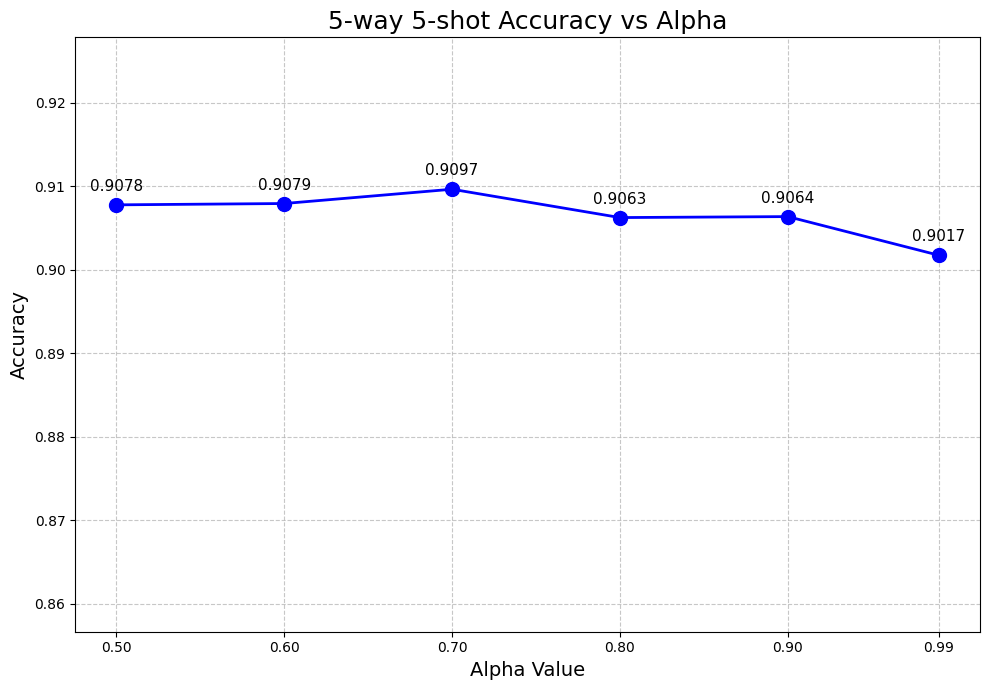

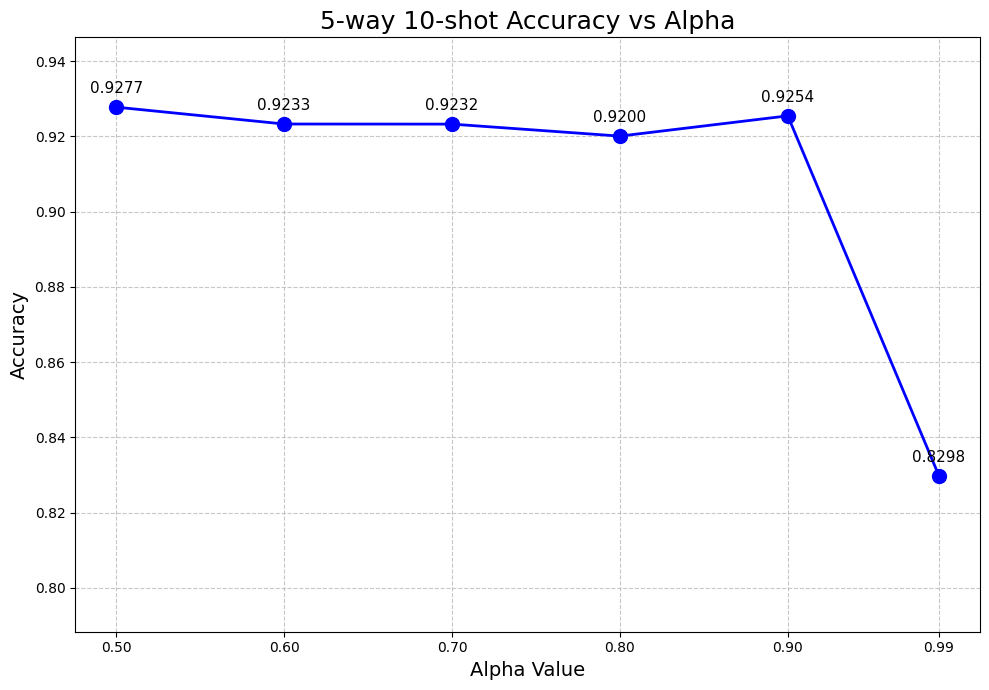

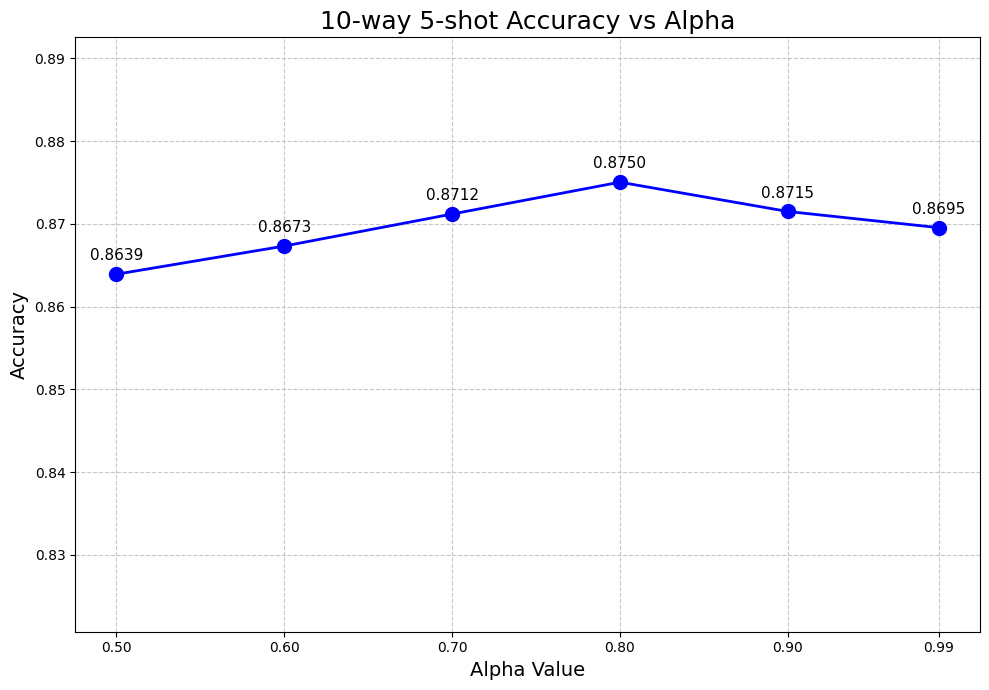

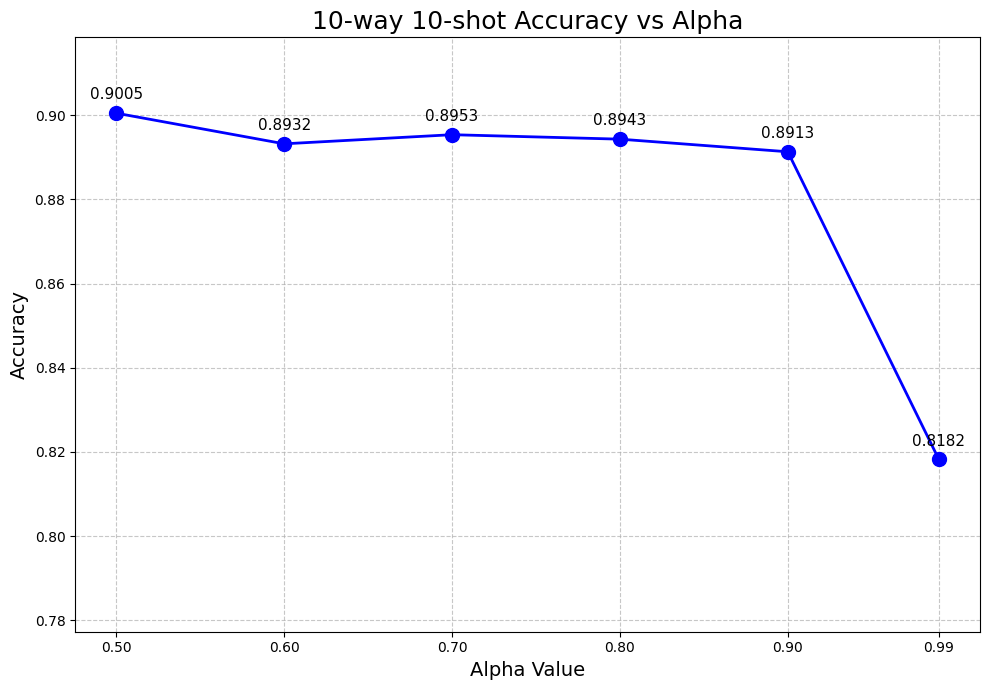

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io

# Parse the CSV data
df = pd.read_csv(csv_path)

# Extract alpha values from the 'Net' column
df['alpha'] = df['Net'].str.extract(r'alpha([\d.]+)').astype(float)

# List of experiment types
experiments = ['5way_5shot', '5way_10shot', '10way_5shot', '10way_10shot']
titles = ['5-way 5-shot', '5-way 10-shot', '10-way 5-shot', '10-way 10-shot']
filenames = ['5way_5shot.png', '5way_10shot.png', '10way_5shot.png', '10way_10shot.png']

# Create separate figure for each experiment
for exp, title, filename in zip(experiments, titles, filenames):
    plt.figure(figsize=(10, 7))
    plt.plot(df['alpha'], df[exp], 'o-', linewidth=2, markersize=10, color='blue')
    plt.title(f'{title} Accuracy vs Alpha', fontsize=18)
    plt.xlabel('Alpha Value', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Set proper x-axis ticks
    plt.xticks(df['alpha'])
    
    # Set y-axis limits to better show the differences
    min_acc = df[exp].min() * 0.95
    max_acc = df[exp].max() * 1.02
    plt.ylim(min_acc, max_acc)
    
    # Add the exact values as text labels
    for x, y in zip(df['alpha'], df[exp]):
        plt.annotate(f'{y:.4f}', (x, y), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=11)
    
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Optionally, you can still create a combined plot
def create_combined_plot():
    plt.figure(figsize=(12, 8))
    colors = ['blue', 'red', 'green', 'purple']
    markers = ['o', 's', '^', 'D']
    
    for exp, title, color, marker in zip(experiments, titles, colors, markers):
        plt.plot(df['alpha'], df[exp], marker=marker, linestyle='-', 
                 linewidth=2, markersize=8, label=title, color=color)

    plt.title('Comparison of All N-way K-shot Experiments', fontsize=16)
    plt.xlabel('Alpha Value', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.xticks(df['alpha'])
    plt.tight_layout()
    plt.savefig('nway_kshot_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
